Name: Chanyu Choung
# CMP 414 & 765
# Test 1

**Instructions**
- Test time: **Monday, April 5th, 1:00 - 2:40 pm**
- Total score: 100 points
- **Before you start,** make sure that you save a copy of this notebook in your Google Drive using the option "Save a copy in Drive" from the "File" menu.
- There are two types of questions:
    - **Short answer questions**: you are expected to write your response in detail in the text cells corresponding to these questions.
    - **Coding questions**: you are expected to write correct Python statements, and show the execution results.
- This is an open-book test. You can use the textbook and the class notes to help you solve the problems.
- You can use functions imported from `sklearn`, `numpy`, `pandas`, and `matplotlib`.
- **When you finish the test**, please download the notebook as a PDF file using the "Print" option from the "File" menu (choose "Print to PDF"). Submit the PDF file to Blackboard under the "Test 1" assignment before the end of the test.
- **If you have any questions**, please join the class Zoom meeting 202 609 9616 and ask me.



## Part I: General Knowledge

**Question 1 (10pt)**: Give an example of a regression task and an example of a classification task.

**Your answer:** 
Regression task is to predict a target numeric value.

For an example, it guesses the price of a bag, based on the studied results of similar bags. (ex. size, price, brand of the bag)

--------------------------------------------------------------------------------

Classification task is trained with their class and learn how to sort out.

For an example, classifying spam email is one example. it's trained with many emails to learn it's class (ex. keywords used, senders email)



**Question 2 (10pt):** What is the purpose of a test dataset and how should one use it?

**Your answer:** Test data set is used to test the model. 

So for example, if we train the model with an algorithm.

It'll be used to predict and test to see how accurate the model is.



## Part II: Regression

In this part, we will analyze a dataset about used car prices.

In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the data
cars = pd.read_csv('https://query.data.world/s/eqxrmzlhl3gouxeafp4ayp4sjw32lg',
                      encoding="ISO-8859-1")
print(cars.head())

           dateCrawled  ...             lastSeen
0  2016-03-24 11:52:17  ...  2016-04-07 03:16:57
1  2016-03-24 10:58:45  ...  2016-04-07 01:46:50
2  2016-03-14 12:52:21  ...  2016-04-05 12:47:46
3  2016-03-17 16:54:04  ...  2016-03-17 17:40:17
4  2016-03-31 17:25:20  ...  2016-04-06 10:17:21

[5 rows x 20 columns]


**Question 3 (5 pt)**: Extract the records whose name is "BMW_318i" and year of registration is after 1990. Name the subset `cars_BMW318i`.

In [ ]:
# Solution to Question 3
cars_BMW_318i = cars[(cars["name"] == "BMW_318i") & (cars['yearOfRegistration'] > 1990)]
print(cars_BMW_318i.head())

              dateCrawled      name  ... postalCode             lastSeen
456   2016-04-04 10:57:55  BMW_318i  ...      65558  2016-04-05 12:14:20
1497  2016-03-05 20:53:22  BMW_318i  ...      23558  2016-03-15 07:15:17
1714  2016-03-21 13:36:24  BMW_318i  ...      27356  2016-03-21 13:36:24
3700  2016-03-29 19:55:05  BMW_318i  ...      90443  2016-04-06 06:15:51
4318  2016-03-31 14:48:07  BMW_318i  ...      58840  2016-04-06 07:45:11

[5 rows x 20 columns]


**Question 4 (5 pt):** How many records are extracted?

In [ ]:
# Solution to Question 4
BMW_318i_info = cars_BMW_318i.shape
print(BMW_318i_info[0], "records were extracted")

608 records were extracted


**Question 5 (10 pt):** Draw a scatter plot to show the relationship between the price and the year of registration.

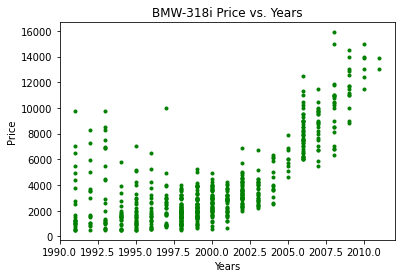

In [ ]:
# Solution to Question 5
plt.title('BMW-318i Price vs. Years')
price = cars_BMW_318i['price']
years = cars_BMW_318i['yearOfRegistration']
plt.plot(years, price, 'g.')
plt.ylabel("Price")
plt.xlabel("Years")
plt.show()

**Question 6 (5 pt):** Build a simple linear model that predicts the price using the year of registration.

In [ ]:
# Solution to Question 6
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(cars_BMW_318i[['yearOfRegistration']], cars_BMW_318i[['price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Question 7 (5 pt):** Show the slope and the y-intercept of the regression line.

In [ ]:
# Solution to Question 7
m = model_lr.coef_[0, 0]
b = model_lr.intercept_[0]
x_coordinates = np.array([1991,2011])
y_coordinates = x_coordinates * m + b
print(m, b)

463.6506899502168 -923338.2168564794


## Part III: Classification

In [ ]:
# Load the data
titanic_url = "https://gist.githubusercontent.com/michhar/2dfd2de0d4f8727f873422c5d959fff5/raw/fa71405126017e6a37bea592440b4bee94bf7b9e/titanic.csv"
titanic = pd.read_csv(titanic_url).drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1).dropna()
print(titanic.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


**Question 8 (5 pt):** In the "Sex" column, convert male to 1 and female to 0.

In [ ]:
# Solution to Question 8
titanic['Sex'].replace("male", 1, inplace=True)
titanic['Sex'].replace("female", 0, inplace=True)
print(titanic.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500


**Question 9 (5 pt):** Split the dataset into `titanic_train` and `titanic_test`. The training set should contain 80% of all data.

In [ ]:
# Solution to Question 9
# Split the data into 80% training data and 20% test data.
from sklearn.model_selection import train_test_split
titanic_train, titanic_test = train_test_split(titanic, test_size=0.2)
titanic_test = titanic_test.copy()

**Question 10 (10 pt)**: List at least two machine learning models that can be used to predict the survival of each passenger.

**Your Answer:** Logistic Regression (with Binary Classifier) and Support Vector Machine (with Linear SVM)

**Question 11 (20 pt)** Apply one machine learning model and show the accuracy, precision, recall of the model on the test set.

In [ ]:
# Solution to Question 11
col = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
model.fit(titanic_train.loc[:, col], titanic_train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# precision - recall - f1 score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
test_predictions = model.predict(titanic_test.loc[:, col])
print(accuracy_score(titanic_test['Survived'], test_predictions))

precision = precision_score(titanic_test['Survived'], test_predictions)
recall = recall_score(titanic_test['Survived'], test_predictions)
f1 = f1_score(titanic_test['Survived'], test_predictions)
print(precision, recall, f1)

0.8041958041958042
0.8627450980392157 0.676923076923077 0.7586206896551724
